## HandWriting Numbers Recognition (keras + TF)

ref : https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [1]:
from keras.datasets import  mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print("dimension of x_train :",x_train[0].shape)
print("labels in y_train  : ", y_train.shape)

dimension of x_train : (28, 28)
labels in y_train  :  (60000,)


In [6]:
print("dimension of x_train :",x_test[0].shape)
print("labels in y : ", y_test.shape)

dimension of x_train : (28, 28)
labels in y :  (10000,)


In [7]:
## view images

In [8]:
import cv2
import numpy as np

for i in range(0,6):
    random_num = np.random.randint(0,len(x_train))
    img = x_train[random_num]
#     print(img)
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
import matplotlib.pyplot as plt

for i in range(0,6):
    plt.subplot(000)
    random_num = np.random,randint(0,len(x_train))
    plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.show()

ValueError: Integer subplot specification must be a three-digit number, not 0

<Figure size 432x288 with 0 Axes>

In [10]:
print(x_train[0])

#it has 6000 images 
#one image contaion 28*28


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [11]:
## prepare for training

In [12]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
print(img_rows, img_cols)

28 28


In [13]:
#keras need 4th dimension data set 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test =  x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1) # foe single image 1 for grayscale

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255 # all data set to color range from (0-255)
x_test /= 255

In [15]:
window_name = 'Random Sample #' + str(i)
cv2.imshow(window_name,x_train[0]) #it shows 5
print(y_train[0])
cv2.waitKey(0)         
cv2.destroyAllWindows()

5


In [16]:
##one hot encoder for labels 

In [17]:
from keras.utils import np_utils

In [18]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
print(num_classes)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10


In [19]:
#build the model

In [20]:
import keras
from keras.models import Sequential #linear stack of layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k
from keras.optimizers import SGD

In [21]:
model = Sequential() 
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',input_shape = input_shape)) # 1st layer, add imput shape in to conv layer,it contain 32 filters, 3*3 with relu (32 * 28 * 28) 
model.add(Conv2D(64, (3, 3), activation='relu')) #2nd layer dont need specify input shape here(take output from 1st layer)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # use to feed dense(fully connected layer)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #output -> no of classes use softmax to take probabilites

model.compile(loss='categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy']) #loss_algo = >categorical_crossentropy ,  optimizer = > Soc. gradient discent , metirics => what we need to look
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

In [58]:
## Train the Model

In [25]:
batch_size = 32 # how many images process in batch
epochs = 10

history = model.fit(
    x_train, 
    y_train,
    batch_size = batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print(score)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.5822 - accuracy: 0.8177 - val_loss: 0.2037 - val_accuracy: 0.9413
Epoch 2/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.3033 - accuracy: 0.9079 - val_loss: 0.1461 - val_accuracy: 0.9546
Epoch 3/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.2363 - accuracy: 0.9287 - val_loss: 0.1145 - val_accuracy: 0.9651
Epoch 4/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.1879 - accuracy: 0.9450 - val_loss: 0.0897 - val_accuracy: 0.9721
Epoch 5/10
60000/60000 [==============================] - 33s 557us/step - loss: 0.1550 - accuracy: 0.9536 - val_loss: 0.0735 - val_accuracy: 0.9776
Epoch 6/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.1295 - accuracy: 0.9613 - val_loss: 0.0616 - val_accuracy: 0.9802
Epoch 7/10
60000/60000 [==============================]

In [26]:
print("test loss", score[0])
print('test accuracy', score[1])

test loss 0.047459719040454366
test accuracy 0.9853000044822693


In [27]:
import matplotlib.pyplot as plt

print(history.history)
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']



{'val_loss': [0.20366466523110865, 0.14614529290273787, 0.1144931991815567, 0.08965096453502774, 0.0734739482557401, 0.061563821865478534, 0.05665900217851158, 0.05122084957526531, 0.04937874088344397, 0.047459719040454366], 'val_accuracy': [0.9412999749183655, 0.9545999765396118, 0.9650999903678894, 0.972100019454956, 0.9775999784469604, 0.9801999926567078, 0.9821000099182129, 0.9837999939918518, 0.9843000173568726, 0.9853000044822693], 'loss': [0.5821704989790917, 0.3032726678013802, 0.2363259772916635, 0.18790124670813482, 0.15498779363607368, 0.12952678080499172, 0.11562160272101561, 0.10433553920363386, 0.09388956551117202, 0.08725659974788626], 'accuracy': [0.81768334, 0.90786666, 0.92873335, 0.9450333, 0.9536333, 0.96133333, 0.96561664, 0.9688333, 0.97195, 0.9736]}


In [28]:
print(loss_values)
print()
print(val_loss_values)

[0.5821704989790917, 0.3032726678013802, 0.2363259772916635, 0.18790124670813482, 0.15498779363607368, 0.12952678080499172, 0.11562160272101561, 0.10433553920363386, 0.09388956551117202, 0.08725659974788626]

[0.20366466523110865, 0.14614529290273787, 0.1144931991815567, 0.08965096453502774, 0.0734739482557401, 0.061563821865478534, 0.05665900217851158, 0.05122084957526531, 0.04937874088344397, 0.047459719040454366]


In [29]:
epochs = range(1, len(loss_values) + 1)

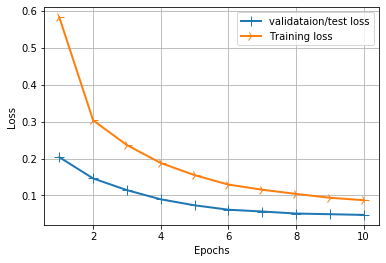

In [30]:
#loss charts
line1 = plt.plot(epochs, val_loss_values, label="validataion/test loss")
line2 = plt.plot(epochs, loss_values, label="Training loss")
plt.setp(line1, linewidth=2.0, marker='+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


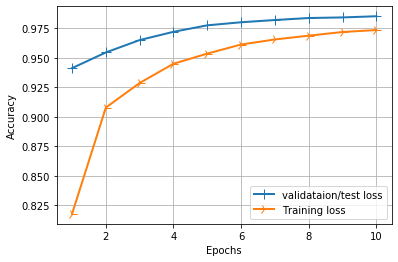

In [31]:
#accuracy charts
print(history_dict.keys())
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

line1 = plt.plot(epochs, val_acc_values, label="validataion/test loss")
line2 = plt.plot(epochs, acc_values, label="Training loss")
plt.setp(line1, linewidth=2.0, marker='+', markersize = 10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
#save and load model as classifier

In [33]:
model.save('handwritten_number_reco_model.h5')

In [34]:
from keras.models import load_model
classifier = load_model('handwritten_number_reco_model.h5')

In [35]:
#test with classifer

In [36]:
input_im = x_test[30]
input_im = input_im.reshape(1, 28, 28, 1)

res =str(classifier.predict_classes(input_im, 1, verbose= 0)[0])

print(res)

3


In [37]:
def visualize_results(name, pred, input_im):
    BLACK = [0, 0, 0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (2, 255, 0), 2)
    cv2.imshow(name, expanded_image)

In [38]:
for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1)

    res =str(classifier.predict_classes(input_im, 1, verbose= 0)[0])

    visualize_results("Prediction", res, imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [39]:
## visualize the model

In [40]:
from keras.utils.vis_utils import plot_model

In [41]:
model = Sequential() 
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu',input_shape = input_shape)) # 1st layer, add imput shape in to conv layer,it contain 32 filters, 3*3 with relu (32 * 28 * 28) 
model.add(Conv2D(64, (3, 3), activation='relu')) #2nd layer dont need specify input shape here(take output from 1st layer)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # use to feed dense(fully connected layer)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #output -> no of classes use softmax to take probabilites

model.compile(loss='categorical_crossentropy', optimizer = SGD(), metrics = ['accuracy']) #loss_algo = >categorical_crossentropy ,  optimizer = > Soc. gradient discent , metirics => what we need to look
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

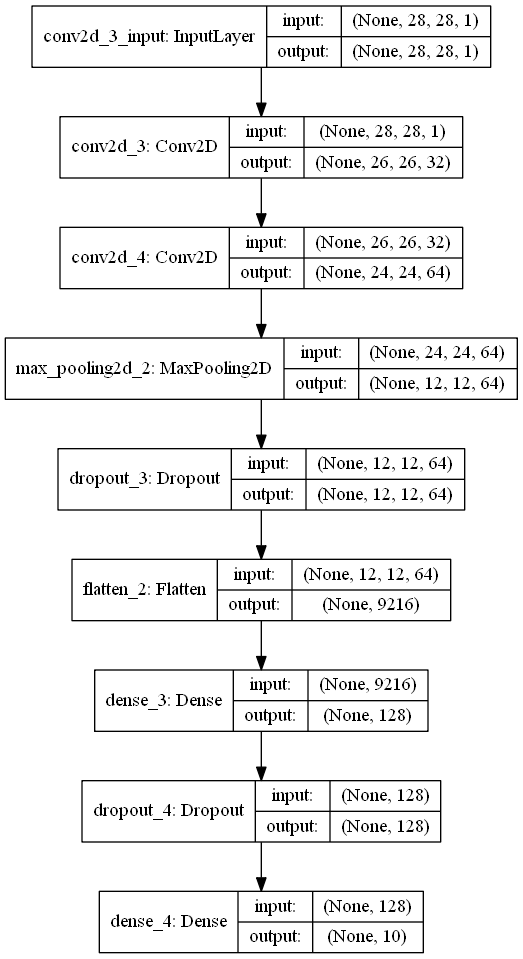

In [49]:
plot_model(model, to_file = '/Users/D.ShaN/Documents/Python/plot.png', 
           show_shapes = True, show_layer_names=True) #need pydot and graphviz
